## Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Read the data

In [2]:
df = pd.read_csv(r'E:\Machine Learning Project\netflix\n_movies.csv')

In [3]:
df.columns

Index(['title', 'year', 'certificate', 'duration', 'genre', 'rating',
       'description', 'stars', 'votes'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9957 entries, 0 to 9956
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        9957 non-null   object 
 1   year         9430 non-null   object 
 2   certificate  6504 non-null   object 
 3   duration     7921 non-null   object 
 4   genre        9884 non-null   object 
 5   rating       8784 non-null   float64
 6   description  9957 non-null   object 
 7   stars        9957 non-null   object 
 8   votes        8784 non-null   object 
dtypes: float64(1), object(8)
memory usage: 700.2+ KB


In [5]:
df.isnull().sum()

title             0
year            527
certificate    3453
duration       2036
genre            73
rating         1173
description       0
stars             0
votes          1173
dtype: int64

## Data cleaning and preparation

In [6]:
df['year'].value_counts()

(2020)          663
(2019)          641
(2021)          494
(2018)          434
(2017)          397
               ... 
(1981–1989)       1
(III) (2016)      1
(2002–2005)       1
(1992–2014)       1
(1985– )          1
Name: year, Length: 498, dtype: int64

In [7]:
df['year'] = df['year'].replace('nan', '')

In [8]:
df['year'].value_counts()

(2020)          663
(2019)          641
(2021)          494
(2018)          434
(2017)          397
               ... 
(1981–1989)       1
(III) (2016)      1
(2002–2005)       1
(1992–2014)       1
(1985– )          1
Name: year, Length: 498, dtype: int64

In [9]:
df = df.dropna().reset_index(drop = True)

In [10]:
year = []
for i in range(len(df)):
    if len(df['year'][i])>1:
        period = re.findall(r'[0-9]+',df['year'][i])
        if len(period)>1:
            period = [period[0] + '-' + period[1]]
        year.append(period)

In [11]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

In [12]:
len(year)

5754

In [13]:
len(df['year'])

5754

In [14]:
for i in range(len(year)):
    df.loc[i,'year_str'] = year[i][0]

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,5754.0,6.792822,1.226242,1.7,6.1,6.9,7.7,9.9


In [16]:
votes = []
for i in range(len(df)):
    votes.append("".join(re.findall('[0-9]', df['votes'][i])))

In [17]:
df['votes'] = votes

In [18]:
df['votes'] = df['votes'].astype('int64')

In [19]:
C = df['rating'].mean()

In [20]:
C

6.792822384428223

In [21]:
m = df['votes'].quantile(0.9)

In [22]:
minimum_votes = df['votes'].quantile(0.9)
df = df[df['votes'] >= minimum_votes ]
df = df.reset_index(drop = True)

In [23]:
def weighted_rating(df,C = C, m = m):
    R = df['rating']
    v = df['votes']
    return (v/(v+m) * R) + (m/(m+v) * C)
    

In [24]:
df['imdb_rating'] = weighted_rating(df, C, m)

In [25]:
df['imdb_rating'].max()

9.415924362148752

In [26]:
df = df.reset_index(drop = True)

In [27]:
df

,title,year,certificate,duration,genre,rating,description,stars,votes,year_str,imdb_rating
0,Cobra Kai,(2018– ),TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...",177031,2018,8.074898
1,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...",199885,2016,8.267069
2,Better Call Saul,(2015–2022),TV-MA,46 min,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...",501384,2015-2022,8.679160
3,The Sandman,(2022– ),TV-MA,45 min,"Drama, Fantasy, Horror",7.8,Upon escaping after decades of imprisonment by...,"['Tom Sturridge, ', 'Boyd Holbrook, ', 'Patton...",116358,2022,7.462281
4,Rick and Morty,(2013– ),TV-MA,23 min,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"['Justin Roiland, ', 'Chris Parnell, ', 'Spenc...",502160,2013,8.948068
...,...,...,...,...,...,...,...,...,...,...,...
571,American Horror Story,(2011– ),TV-MA,60 min,"Drama, Horror, Sci-Fi",8.0,An anthology series centering on different cha...,"['Lady Gaga, ', 'Kathy Bates, ', 'Angela Basse...",312974,2011,7.809349
572,Breaking Bad,(2008–2013),TV-MA,49 min,"Crime, Drama, Thriller",9.5,A high school chemistry teacher diagnosed with...,"['Bryan Cranston, ', 'Aaron Paul, ', 'Anna Gun...",1831359,2008-2013,9.415924
573,The Walking Dead,(2010–2022),TV-MA,44 min,"Drama, Horror, Thriller",8.1,Sheriff Deputy Rick Grimes wakes up from a com...,"['Andrew Lincoln, ', 'Norman Reedus, ', 'Melis...",970067,2010-2022,8.025416
574,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...",199898,2016,8.267091


In [28]:
df[df['title'] == 'Rick and Morty'].index

Int64Index([4], dtype='int64')

In [29]:
for title in df['title']: 
    if len(df[df['title'] == title]) > 1:
        min_ = df[df['title'] == title]['votes'].min()
        index = df[(df['title'] == title) & (df['votes'] == min_)].index
        df = df.drop(index, axis =0 )

In [30]:
df = df.reset_index(drop = True)

In [31]:
duration = []
for i in df['duration']:
    time = re.findall(r'[0-9]+', str(i))[0]
    duration.append(time)

30
46
23
60
41
46
60
44
22
60
22
24
43
48
113
60
45
201
43
22
53
22
22
54
22
110
187
41
179
102
169
45
45
47
43
22
49
22
45
114
194
60
88
53
22
60
113
41
58
60
44
25
15
70
59
127
44
60
60
45
43
124
22
55
97
24
60
44
60
60
22
65
135
49
45
55
572
42
50
138
43
60
155
53
450
114
41
110
42
22
45
121
117
151
23
45
121
51
42
44
117
44
42
42
149
60
47
23
44
44
43
40
30
122
132
116
45
56
99
60
60
545
140
106
30
110
121
138
60
60
96
149
128
90
24
48
125
11
30
116
60
50
117
45
126
113
494
24
116
128
46
111
298
135
115
110
44
60
43
157
209
128
30
60
24
102
25
156
118
56
102
452
24
60
107
123
25
42
157
55
385
123
129
45
90
130
119
60
60
44
60
106
112
28
94
42
107
119
42
108
147
134
30
126
60
95
128
140
89
44
100
103
133
118
112
126
114
129
133
100
22
107
103
118
60
121
23
98
139
60
107
119
84
111
109
60
137
50
102
92
127
148
218
129
24
110
127
30
137
106
118
119
88
115
91
152
97
45
125
120
85
121
98
116
127
130
121
124
22
136
94
115
140
121
133
137
60
119
118
94
105
111
101
30
42
89
94
106
88
102
1

In [32]:
df['duration'] = duration

In [33]:
df['duration']

0      30
1      46
2      23
3      60
4      41
       ..
547    60
548    49
549    44
550    58
551    44
Name: duration, Length: 552, dtype: object

In [34]:
df['duration'] = df['duration'].astype('float64')

In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,552.0,97.887681,65.350945,11.000000,55.000000,101.000000,118.000000,5.720000e+02
rating,552.0,7.312862,0.995579,3.300000,6.600000,7.400000,8.100000,9.500000e+00
votes,552.0,219927.467391,238151.375774,58711.000000,87900.750000,133177.000000,256114.750000,1.844075e+06
imdb_rating,552.0,7.199709,0.726818,4.687457,6.638746,7.201711,7.725625,9.415924e+00


<Axes: >

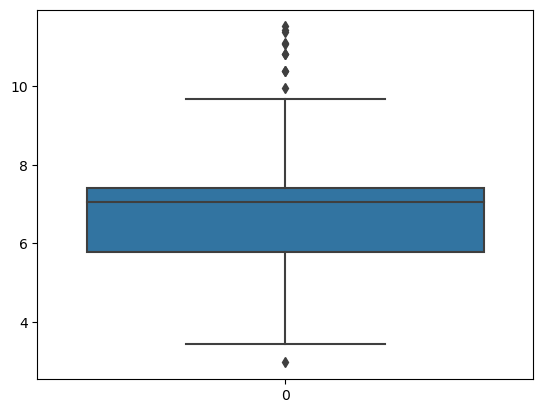

In [36]:
sns.boxplot(stats.boxcox(df['duration'])[0])

<Axes: >

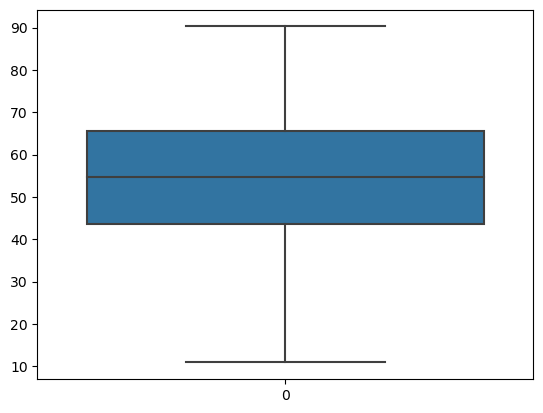

In [37]:
sns.boxplot(np.square(df['rating']))

<Axes: >

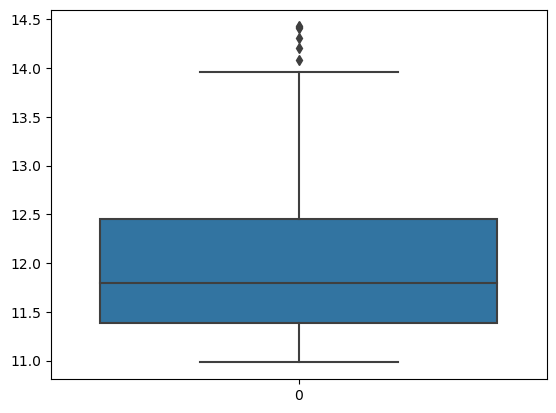

In [38]:
sns.boxplot(np.log(df['votes']))

In [39]:
df['genre'].value_counts()

Action, Crime, Drama            29
Crime, Drama, Mystery           25
Action, Adventure, Drama        24
Comedy                          19
Animation, Adventure, Comedy    18
                                ..
Biography, Drama, Musical        1
Drama, Horror, Music             1
Adventure, Comedy, Fantasy       1
Crime, Mystery, Thriller         1
Drama, Horror, Sci-Fi            1
Name: genre, Length: 156, dtype: int64

In [40]:
df['description'][0].lower()

'decades after their 1984 all valley karate tournament bout, a middle-aged daniel larusso and johnny lawrence find themselves martial-arts rivals again.'

In [41]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from spellchecker import SpellChecker
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")
nltk.download("omw-1.4")
from string import digits


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kavit\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\kavit\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [42]:
import spacy

#loading the english language small model of spacy
en = spacy.load('en_core_web_sm')
sw_spacy = en.Defaults.stop_words

In [43]:
import re
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [44]:
import re
from collections import Counter
from spellchecker import SpellChecker

spelling = SpellChecker()

def words(text): return re.findall(r'\w+', text.lower())

WORDS = Counter(words(open(r"E:\Machine Learning Project\big.txt").read()))

def P(word, N=sum(WORDS.values())): 
    "Probability of `word`."
    return WORDS[word] / N

def correction(word): 
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)

def candidates(word): 
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words): 
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)

def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word): 
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))
def spelling_checks(text):
    correct_result = []
    typo_words = spelling.unknown(text.split())
    for word in text.split():
        if word in typo_words:
            correct_word = spelling.correction(word)
            if correct_word != None:
                correct_result.append(correct_word)
            else:
                correct_result.append(correction(word))
        else:
            correct_result.append(word)
    return " ".join(correct_result)



In [45]:
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in '!"#$%&\'()*+,./:;<=>?@[\\]^_`{|}~'])
    return punctuationfree

In [46]:
def remove_stop_words(text):
    words = []
    words = [word for word in text.split() if word.lower() not in sw_spacy]
    new_text = " ".join(words)
    return new_text

In [47]:
def Negation(sentence):	
    temp = int(0)
    for i in range(len(sentence)):
        if sentence[i-1] in ['not',"n't", 'nothing']:
            antonyms = []
            for syn in wordnet.synsets(sentence[i]):
                syns = wordnet.synsets(sentence[i])
                w1 = syns[0].name()
                temp = 0
                for l in syn.lemmas():
                    if l.antonyms():
                        antonyms.append(l.antonyms()[0].name())
                max_dissimilarity = 0
                for ant in antonyms:
                    syns = wordnet.synsets(ant)
                    w2 = syns[0].name()
                    syns = wordnet.synsets(sentence[i])
                    w1 = syns[0].name()
                    word1 = wordnet.synset(w1)
                    word2 = wordnet.synset(w2)
                    if isinstance(word1.wup_similarity(word2), float) or isinstance(word1.wup_similarity(word2), int):
                          temp = 1 - word1.wup_similarity(word2)
                    if temp>max_dissimilarity:
                            max_dissimilarity = temp
                            antonym_max = ant
                            sentence[i] = antonym_max
                            sentence[i-1] = ''
    while '' in sentence:
        sentence.remove('')
    return sentence

In [48]:
def preprocess_text(text):
    text = re.sub(r' +', " ", text) #remove extra spaces between text
    text = text.lower() # turn all text to lower case
    text = decontracted(text) #expand contractions in the text
    text = re.sub(r'[0-9]+', '<NUMBER>', text) #replace digits with a <NUMBER> tag
    remove_digits = str.maketrans('', '', digits)
    res = text.translate(remove_digits) #remove digits in text string 
    text = re.sub(r'http\S+', '', res) #remove URL's
    text = re.sub(r'[\\/]+', ' ', text) 
    text = re.sub(r'[.]+', '. ', text) # replace period with space after the period
    words = word_tokenize(text)
    typo_words = spelling.unknown(words) # do a spell check and get the words that are incorrectly spelled 
    words = [spelling_checks(word) if word in typo_words else word for word in words] #correct the incorrectly spelt words
    words = Negation(words)
    words = [word for word in words if word not in sw_spacy ] #remove stop words
    words = [remove_punctuation(word) for word in words] #remove punctuation
    lemmatiser = WordNetLemmatizer()
    words_stem = [lemmatiser.lemmatize(word) if word != '<NUMBER>' else word for word in words] #stem words
    words_stem = [word for word in words_stem if word] #remove empty strings
    return words_stem
    
    

In [49]:
preprocess_text(df['description'][0])

['decade',
 'NUMBER',
 'valley',
 'karate',
 'tournament',
 'bout',
 'middle-aged',
 'daniel',
 'lasso',
 'johnny',
 'lawrence',
 'find',
 'martial-arts',
 'rival']

In [50]:
df.duplicated().sum()

0

In [51]:
df['title'].value_counts()

Cobra Kai                     1
Ender's Game                  1
The Trial of the Chicago 7    1
Triple Frontier               1
Lord of War                   1
                             ..
Zodiac                        1
DC's Legends of Tomorrow      1
The IT Crowd                  1
Jumanji: The Next Level       1
Supernatural                  1
Name: title, Length: 552, dtype: int64

In [52]:
df['title'].nunique()

552

In [53]:
df['description'].nunique()

552

In [54]:
len(df)

552

In [55]:
df[df['title'] == 'Breaking Bad']

,title,year,certificate,duration,genre,rating,description,stars,votes,year_str,imdb_rating
548,Breaking Bad,(2008–2013),TV-MA,49.0,"Crime, Drama, Thriller",9.5,A high school chemistry teacher diagnosed with...,"['Bryan Cranston, ', 'Aaron Paul, ', 'Anna Gun...",1831359,2008-2013,9.415924


In [56]:
descriptions = list(df['description'])

In [57]:
df.columns

Index(['title', 'year', 'certificate', 'duration', 'genre', 'rating',
       'description', 'stars', 'votes', 'year_str', 'imdb_rating'],
      dtype='object')

In [58]:
genres = []

In [59]:
for i in range(len(df)):
    genre = df.loc[i, 'genre']
    genre = genre.split(',')
    genre = [x.strip() for x in genre]
    for gen in genre:
        if gen not in genres:
            genres.append(gen)

In [60]:
genres

['Action',
 'Comedy',
 'Drama',
 'Crime',
 'Animation',
 'Adventure',
 'Romance',
 'Thriller',
 'Mystery',
 'Sci-Fi',
 'Fantasy',
 'Horror',
 'History',
 'Short',
 'Biography',
 'Sport',
 'Music',
 'Musical',
 'Family',
 'Western',
 'War',
 'Reality-TV',
 'Documentary',
 'Film-Noir',
 'News']

In [61]:
genre_count = {}
for genre in list(df['genre']):
    genre = genre.split(',')
    for gen in list(genre):
        gen = gen.strip()
        if gen in genre_count.keys():
            genre_count[gen] += 1
        else:
            genre_count[gen] = 1
        

In [62]:
counts_gen = [v for k,v in genre_count.items()]
keys = [k for k,v in genre_count.items()]

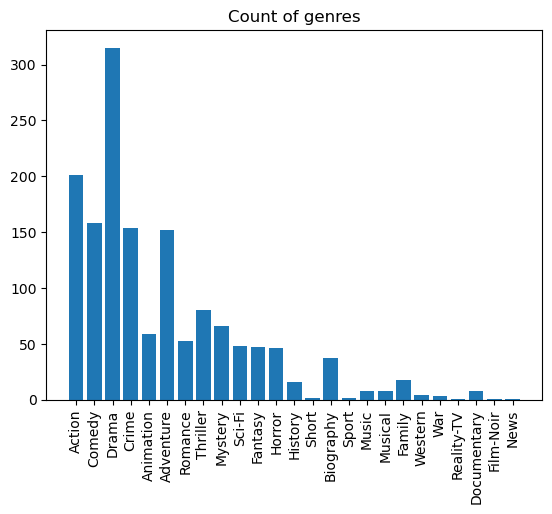

In [172]:
plt.bar(x = keys, height = counts_gen)
plt.xticks(rotation = 90)
plt.title('Count of genres');

In [64]:
df_copy = df.copy()

In [65]:
df.columns 

Index(['title', 'year', 'certificate', 'duration', 'genre', 'rating',
       'description', 'stars', 'votes', 'year_str', 'imdb_rating'],
      dtype='object')

In [66]:
c =10

In [67]:
for i in genre_count.keys():
    df_copy.insert(c,i,0 )
    c+= 1

In [68]:
df_copy.columns

Index(['title', 'year', 'certificate', 'duration', 'genre', 'rating',
       'description', 'stars', 'votes', 'year_str', 'Action', 'Comedy',
       'Drama', 'Crime', 'Animation', 'Adventure', 'Romance', 'Thriller',
       'Mystery', 'Sci-Fi', 'Fantasy', 'Horror', 'History', 'Short',
       'Biography', 'Sport', 'Music', 'Musical', 'Family', 'Western', 'War',
       'Reality-TV', 'Documentary', 'Film-Noir', 'News', 'imdb_rating'],
      dtype='object')

In [69]:
def one_hot_coding_genre(genre):
    for i,gen in enumerate(genre):
        gen_l = gen.split(',')
        gen_l = [x.strip() for x in gen_l]
        for key in gen_l:
            df_copy.loc[i, key] = 1
    return df_copy
        
    
    

In [70]:
gens = list(df['genre'])

In [71]:
df_copy = one_hot_coding_genre(df['genre'])

In [72]:
df_copy['genre']

0             Action, Comedy, Drama
1                      Crime, Drama
2      Animation, Adventure, Comedy
3                      Crime, Drama
4                    Drama, Romance
                   ...             
547           Drama, Horror, Sci-Fi
548          Crime, Drama, Thriller
549         Drama, Horror, Thriller
550       Biography, Drama, History
551          Drama, Fantasy, Horror
Name: genre, Length: 552, dtype: object

In [73]:
genres[0]

'Action'

In [74]:
genre_cat = []
for i in genres:
    if i not in genre_cat:
        genre_cat.append(i)

In [75]:
genre_cat

['Action',
 'Comedy',
 'Drama',
 'Crime',
 'Animation',
 'Adventure',
 'Romance',
 'Thriller',
 'Mystery',
 'Sci-Fi',
 'Fantasy',
 'Horror',
 'History',
 'Short',
 'Biography',
 'Sport',
 'Music',
 'Musical',
 'Family',
 'Western',
 'War',
 'Reality-TV',
 'Documentary',
 'Film-Noir',
 'News']

In [76]:
df_copy.columns

Index(['title', 'year', 'certificate', 'duration', 'genre', 'rating',
       'description', 'stars', 'votes', 'year_str', 'Action', 'Comedy',
       'Drama', 'Crime', 'Animation', 'Adventure', 'Romance', 'Thriller',
       'Mystery', 'Sci-Fi', 'Fantasy', 'Horror', 'History', 'Short',
       'Biography', 'Sport', 'Music', 'Musical', 'Family', 'Western', 'War',
       'Reality-TV', 'Documentary', 'Film-Noir', 'News', 'imdb_rating'],
      dtype='object')

In [77]:
df_copy['genre'][1]

'Crime, Drama'

In [78]:
df_copy['stars'][0]

"['Ralph Macchio, ', 'William Zabka, ', 'Courtney Henggeler, ', 'Xolo Maridueña']"

In [79]:
re.sub(r'[\[\]\"\'\']+', '', df_copy['stars'][0]).split(', ,')

['Ralph Macchio', ' William Zabka', ' Courtney Henggeler', ' Xolo Maridueña']

In [80]:
actors = []
for i in range(len(df_copy)):
    
    act = re.sub(r'[\[\]\"\'\'\|]+', '', df_copy.loc[i,'stars'])
    act = re.sub(r'\,\s+\S+\:+', '', act)
    act = re.sub(r'\,\s+\,', ',', act).split(',')
    act = [a.strip() for a in act]
    actors.append(act)
    

In [81]:
actor_count = {}

In [82]:
for lst in actors:
    for act in lst: 
        if act in actor_count.keys():
            actor_count[act] += 1
        else:
            actor_count[act] = 1

In [83]:
actors

[['Ralph Macchio', 'William Zabka', 'Courtney Henggeler', 'Xolo Maridueña'],
 ['Bob Odenkirk', 'Rhea Seehorn', 'Jonathan Banks', 'Patrick Fabian'],
 ['Justin Roiland', 'Chris Parnell', 'Spencer Grammer', 'Sarah Chalke'],
 ['Cillian Murphy', 'Paul Anderson', 'Sophie Rundle', 'Helen McCrory'],
 ['Ellen Pompeo', 'Chandra Wilson', 'James Pickens Jr.', 'Justin Chambers'],
 ['Emmy Rossum', 'William H. Macy', 'Ethan Cutkosky', 'Jeremy Allen White'],
 ['Jason Bateman', 'Laura Linney', 'Sofia Hublitz', 'Skylar Gaertner'],
 ['Gabriel Macht', 'Patrick J. Adams', 'Meghan Markle', 'Sarah Rafferty'],
 ['Jerry Seinfeld',
  'Julia Louis-Dreyfus',
  'Michael Richards',
  'Jason Alexander'],
 ['Elliot Page', 'Tom Hopper', 'David Castañeda', 'Emmy Raver-Lampman'],
 ['Andy Samberg', 'Stephanie Beatriz', 'Terry Crews', 'Melissa Fumero'],
 ['Josh Grelle', 'Yûki Kaji', 'Yui Ishikawa', 'Marina Inoue'],
 ['Melissa Roxburgh', 'Josh Dallas', 'J.R. Ramirez', 'Luna Blaise'],
 ['Darby Stanchfield',
  'Connor Jessup

In [84]:
from collections import Counter
Counter(actor_count).most_common()

[('Dwayne Johnson', 10),
 ('Hayao Miyazaki', 10),
 ('Russell Crowe', 7),
 ('James Franco', 7),
 ('Ryan Reynolds', 7),
 ('Jason Statham', 7),
 ('Cate Blanchett', 6),
 ('Jon Bernthal', 6),
 ('Gary Oldman', 6),
 ('Mark Wahlberg', 6),
 ('Jake Gyllenhaal', 6),
 ('Johnny Depp', 6),
 ('Liam Neeson', 6),
 ('Jamie Foxx', 5),
 ('Christian Bale', 5),
 ('Leonardo DiCaprio', 5),
 ('Kathy Bates', 5),
 ('Carla Gugino', 5),
 ('Adam Sandler', 5),
 ('Matt Damon', 5),
 ('Sarah Paulson', 5),
 ('Zac Efron', 5),
 ('Mark Ruffalo', 5),
 ('Gerard Butler', 5),
 ('Tom Hardy', 5),
 ('Jack Black', 5),
 ('Woody Harrelson', 5),
 ('Robert Rodriguez', 5),
 ('Antonio Banderas', 5),
 ('Peter Jackson', 4),
 ('Ian McKellen', 4),
 ('Orlando Bloom', 4),
 ('Neil Patrick Harris', 4),
 ('Vincent DOnofrio', 4),
 ('Matthew McConaughey', 4),
 ('Scarlett Johansson', 4),
 ('Charlie Hunnam', 4),
 ('Aaron Paul', 4),
 ('Steven Spielberg', 4),
 ('Robert De Niro', 4),
 ('Jack Nicholson', 4),
 ('Henry Cavill', 4),
 ('Lily Collins', 4),
 

In [174]:
actor_label = [k for k,v in dict(Counter(actor_count).most_common(10)).items()]
actor_count = [v for k,v in dict(Counter(actor_count).most_common(10)).items()]

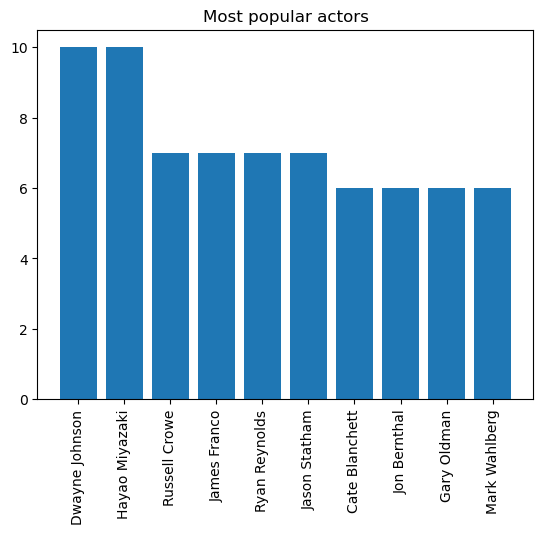

In [178]:
plt.bar(x = actor_label, height = actor_count)
plt.xticks(rotation = 90)
plt.title('Most popular actors');

In [86]:
pd.cut(df['rating'], bins = 2).value_counts()

(6.4, 9.5]      434
(3.294, 6.4]    118
Name: rating, dtype: int64

In [87]:
preprocess_text(df_copy['description'][0])

['decade',
 'NUMBER',
 'valley',
 'karate',
 'tournament',
 'bout',
 'middle-aged',
 'daniel',
 'lasso',
 'johnny',
 'lawrence',
 'find',
 'martial-arts',
 'rival']

In [88]:
nltk.download("wordnet")


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kavit\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [89]:
from nltk.corpus import wordnet 

In [90]:
keywords = []
for text in df_copy['description']:
    clean_text = preprocess_text(text)
    print(clean_text)
    keywords.append(clean_text)

['decade', 'NUMBER', 'valley', 'karate', 'tournament', 'bout', 'middle-aged', 'daniel', 'lasso', 'johnny', 'lawrence', 'find', 'martial-arts', 'rival']
['trial', 'tribulation', 'criminal', 'lawyer', 'jimmy', 'chill', 'fateful', 'runnin', 'walter', 'white', 'jesse', 'wingman']
['animated', 'series', 'follows', 'exploit', 'super', 'scientist', 'not-so-bright', 'grandson']
['gangster', 'family', 'epic', 'set', 'NUMBER', 'england', 'centering', 'gang', 'sew', 'razor', 'blade', 'peak', 'cap', 'fierce', 'bos', 'tommy', 'shelby']
['drama', 'centered', 'personal', 'professional', 'life', 'surgical', 'intern', 'supervisor']
['scrappy', 'feisty', 'fiercely', 'loyal', 'chicago', 'family', 'make', 'apology']
['financial', 'advisor', 'drag', 'family', 'chicago', 'missouri', 'mark', 'launder', 'money', 'appease', 'drug', 'bos']
['run', 'drug', 'deal', 'gone', 'bad', 'brilliant', 'college', 'dropout', 'mike', 'ross', 'find', 'working', 'harvey', 'specter', 'new', 'york', 'city', 'best', 'lawyer']
['c

In [91]:
keywords_join = [' '.join(lst) for lst in keywords]

In [92]:
keywords_join

['decade NUMBER valley karate tournament bout middle-aged daniel lasso johnny lawrence find martial-arts rival',
 'trial tribulation criminal lawyer jimmy chill fateful runnin walter white jesse wingman',
 'animated series follows exploit super scientist not-so-bright grandson',
 'gangster family epic set NUMBER england centering gang sew razor blade peak cap fierce bos tommy shelby',
 'drama centered personal professional life surgical intern supervisor',
 'scrappy feisty fiercely loyal chicago family make apology',
 'financial advisor drag family chicago missouri mark launder money appease drug bos',
 'run drug deal gone bad brilliant college dropout mike ross find working harvey specter new york city best lawyer',
 'continuing misadventure neurotic new york city standup comedian jerry seinfeld equally neurotic new york city friend',
 'family child hero grown apart reunite continue protect world',
 'comedy series following exploit det jake peralta diverse lovable colleague police nyp

In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_df = 0.75)
tfidf_matrix = vectorizer.fit_transform(keywords_join)
vectorizer.get_feature_names_out()

array(['abandoned', 'abiding', 'ability', ..., 'zodiac', 'zombie', 'zone'],
      dtype=object)

In [94]:
tfidf_matrix.shape

(552, 3487)

In [95]:
df.columns

Index(['title', 'year', 'certificate', 'duration', 'genre', 'rating',
       'description', 'stars', 'votes', 'year_str', 'imdb_rating'],
      dtype='object')

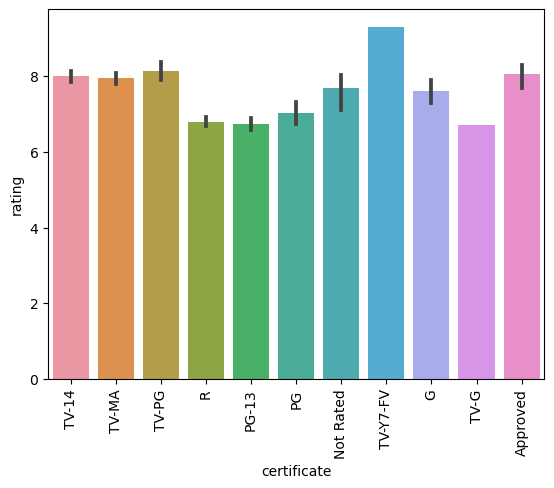

In [96]:
sns.barplot(data=df, x = 'certificate', y = 'rating')
plt.xticks(rotation = 90);


In [98]:
from sklearn.metrics.pairwise import linear_kernel

In [99]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [100]:
df.duplicated().sum()

0

In [101]:
df['title'].value_counts().sort_values(ascending = False)

Cobra Kai             1
Brooklyn Nine-Nine    1
Sex Education         1
Dark                  1
Day Shift             1
                     ..
Breaking Bad          1
The Walking Dead      1
The Crown             1
Friends               1
Supernatural          1
Name: title, Length: 552, dtype: int64

In [102]:
keywords

[['decade',
  'NUMBER',
  'valley',
  'karate',
  'tournament',
  'bout',
  'middle-aged',
  'daniel',
  'lasso',
  'johnny',
  'lawrence',
  'find',
  'martial-arts',
  'rival'],
 ['trial',
  'tribulation',
  'criminal',
  'lawyer',
  'jimmy',
  'chill',
  'fateful',
  'runnin',
  'walter',
  'white',
  'jesse',
  'wingman'],
 ['animated',
  'series',
  'follows',
  'exploit',
  'super',
  'scientist',
  'not-so-bright',
  'grandson'],
 ['gangster',
  'family',
  'epic',
  'set',
  'NUMBER',
  'england',
  'centering',
  'gang',
  'sew',
  'razor',
  'blade',
  'peak',
  'cap',
  'fierce',
  'bos',
  'tommy',
  'shelby'],
 ['drama',
  'centered',
  'personal',
  'professional',
  'life',
  'surgical',
  'intern',
  'supervisor'],
 ['scrappy',
  'feisty',
  'fiercely',
  'loyal',
  'chicago',
  'family',
  'make',
  'apology'],
 ['financial',
  'advisor',
  'drag',
  'family',
  'chicago',
  'missouri',
  'mark',
  'launder',
  'money',
  'appease',
  'drug',
  'bos'],
 ['run',
  'drug

In [103]:
df_copy['keywords'] = keywords

In [104]:
df_copy.head()

,title,year,certificate,duration,genre,rating,description,stars,votes,year_str,...,Musical,Family,Western,War,Reality-TV,Documentary,Film-Noir,News,imdb_rating,keywords
0,Cobra Kai,(2018– ),TV-14,30.0,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...",177031,2018,...,0,0,0,0,0,0,0,0,8.074898,"[decade, NUMBER, valley, karate, tournament, b..."
1,Better Call Saul,(2015–2022),TV-MA,46.0,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...",501384,2015-2022,...,0,0,0,0,0,0,0,0,8.679160,"[trial, tribulation, criminal, lawyer, jimmy, ..."
2,Rick and Morty,(2013– ),TV-MA,23.0,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"['Justin Roiland, ', 'Chris Parnell, ', 'Spenc...",502160,2013,...,0,0,0,0,0,0,0,0,8.948068,"[animated, series, follows, exploit, super, sc..."
3,Peaky Blinders,(2013–2022),TV-MA,60.0,"Crime, Drama",8.8,"A gangster family epic set in 1900s England, c...","['Cillian Murphy, ', 'Paul Anderson, ', 'Sophi...",531058,2013-2022,...,0,0,0,0,0,0,0,0,8.600225,"[gangster, family, epic, set, NUMBER, england,..."
4,Grey's Anatomy,(2005– ),TV-14,41.0,"Drama, Romance",7.6,A drama centered on the personal and professio...,"['Ellen Pompeo, ', 'Chandra Wilson, ', 'James ...",303617,2005,...,0,0,0,0,0,0,0,0,7.469229,"[drama, centered, personal, professional, life..."


In [105]:
actors

[['Ralph Macchio', 'William Zabka', 'Courtney Henggeler', 'Xolo Maridueña'],
 ['Bob Odenkirk', 'Rhea Seehorn', 'Jonathan Banks', 'Patrick Fabian'],
 ['Justin Roiland', 'Chris Parnell', 'Spencer Grammer', 'Sarah Chalke'],
 ['Cillian Murphy', 'Paul Anderson', 'Sophie Rundle', 'Helen McCrory'],
 ['Ellen Pompeo', 'Chandra Wilson', 'James Pickens Jr.', 'Justin Chambers'],
 ['Emmy Rossum', 'William H. Macy', 'Ethan Cutkosky', 'Jeremy Allen White'],
 ['Jason Bateman', 'Laura Linney', 'Sofia Hublitz', 'Skylar Gaertner'],
 ['Gabriel Macht', 'Patrick J. Adams', 'Meghan Markle', 'Sarah Rafferty'],
 ['Jerry Seinfeld',
  'Julia Louis-Dreyfus',
  'Michael Richards',
  'Jason Alexander'],
 ['Elliot Page', 'Tom Hopper', 'David Castañeda', 'Emmy Raver-Lampman'],
 ['Andy Samberg', 'Stephanie Beatriz', 'Terry Crews', 'Melissa Fumero'],
 ['Josh Grelle', 'Yûki Kaji', 'Yui Ishikawa', 'Marina Inoue'],
 ['Melissa Roxburgh', 'Josh Dallas', 'J.R. Ramirez', 'Luna Blaise'],
 ['Darby Stanchfield',
  'Connor Jessup

In [106]:
df_copy['actors'] = actors

In [107]:
number_act = [len(x) for x in actors]

In [108]:
sum(number_act)/len(number_act)

4.695652173913044

In [109]:
df_copy.sort_values('imdb_rating', ascending = False)

,title,year,certificate,duration,genre,rating,description,stars,votes,year_str,...,Family,Western,War,Reality-TV,Documentary,Film-Noir,News,imdb_rating,keywords,actors
548,Breaking Bad,(2008–2013),TV-MA,49.0,"Crime, Drama, Thriller",9.5,A high school chemistry teacher diagnosed with...,"['Bryan Cranston, ', 'Aaron Paul, ', 'Anna Gun...",1831359,2008-2013,...,0,0,0,0,0,0,0,9.415924,"[high, school, chemistry, teacher, diagnosed, ...","[Bryan Cranston, Aaron Paul, Anna Gunn, Betsy ..."
42,Sherlock,(2010–2017),TV-14,88.0,"Crime, Drama, Mystery",9.1,A modern update finds the famous sleuth and hi...,"['Benedict Cumberbatch, ', 'Martin Freeman, ',...",913816,2010-2017,...,0,0,0,0,0,0,0,8.960744,"[modern, update, find, famous, sleuth, doctor,...","[Benedict Cumberbatch, Martin Freeman, Una Stu..."
2,Rick and Morty,(2013– ),TV-MA,23.0,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"['Justin Roiland, ', 'Chris Parnell, ', 'Spenc...",502160,2013,...,0,0,0,0,0,0,0,8.948068,"[animated, series, follows, exploit, super, sc...","[Justin Roiland, Chris Parnell, Spencer Gramme..."
17,The Lord of the Rings: The Return of the King,(2003),PG-13,201.0,"Action, Adventure, Drama",9.0,Gandalf and Aragorn lead the World of Men agai...,"['Peter Jackson', '| ', ' Stars:', 'Elijah ...",1819157,2003,...,0,0,0,0,0,0,0,8.931007,"[gandalf, dragon, lead, world, men, salmon, ar...","[Peter Jackson, Elijah Wood, Viggo Mortensen, ..."
107,Avatar: The Last Airbender,(2005–2008),TV-Y7-FV,23.0,"Animation, Action, Adventure",9.3,"In a war-torn world of elemental magic, a youn...","['Dee Bradley Baker, ', 'Zach Tyler Eisen, ', ...",309241,2005-2008,...,0,0,0,0,0,0,0,8.900021,"[war-torn, world, elemental, magic, young, boy...","[Dee Bradley Baker, Zach Tyler Eisen, Mae Whit..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,Knock Knock,(I) (2015),R,99.0,"Drama, Thriller",4.9,A devoted father helps two stranded young wome...,"['Eli Roth', '| ', ' Stars:', 'Keanu Reeves...",94594,2015,...,0,0,0,0,0,0,0,5.624798,"[devoted, father, help, stranded, young, woman...","[Eli Roth, Keanu Reeves, Lorenza Izzo, Ana de ..."
444,Spy Kids 3: Game Over,(2003),PG,84.0,"Action, Adventure, Comedy",4.3,Carmen's caught in a virtual reality game desi...,"['Robert Rodriguez', '| ', ' Stars:', 'Dary...",60653,2003,...,0,0,0,0,0,0,0,5.526002,"[carmen, caught, virtual, reality, game, desig...","[Robert Rodriguez, Daryl Sabara, Alexa PenaVeg..."
239,The Human Centipede (First Sequence),(2009),R,92.0,Horror,4.4,A mad scientist kidnaps and mutilates a trio o...,"['Tom Six', '| ', ' Stars:', 'Dieter Laser,...",79417,2009,...,0,0,0,0,0,0,0,5.416941,"[mad, scientist, kidnaps, mutilates, trio, tou...","[Tom Six, Dieter Laser, Ashley C. Williams, As..."
412,Scary Movie V,(2013),PG-13,86.0,Comedy,3.5,A couple begin to experience some unusual acti...,"['Malcolm D. Lee, ', 'David Zucker', '| ', ' ...",71952,2013,...,0,0,0,0,0,0,0,4.979398,"[couple, begin, experience, unusual, activity,...","[Malcolm D. Lee, David Zucker, Simon Rex, Ashl..."


In [110]:
len(df_copy.columns)

38

In [111]:
for actor in actor_count.keys():
    df_copy.loc[:, actor] = 0

In [112]:
actors

[['Ralph Macchio', 'William Zabka', 'Courtney Henggeler', 'Xolo Maridueña'],
 ['Bob Odenkirk', 'Rhea Seehorn', 'Jonathan Banks', 'Patrick Fabian'],
 ['Justin Roiland', 'Chris Parnell', 'Spencer Grammer', 'Sarah Chalke'],
 ['Cillian Murphy', 'Paul Anderson', 'Sophie Rundle', 'Helen McCrory'],
 ['Ellen Pompeo', 'Chandra Wilson', 'James Pickens Jr.', 'Justin Chambers'],
 ['Emmy Rossum', 'William H. Macy', 'Ethan Cutkosky', 'Jeremy Allen White'],
 ['Jason Bateman', 'Laura Linney', 'Sofia Hublitz', 'Skylar Gaertner'],
 ['Gabriel Macht', 'Patrick J. Adams', 'Meghan Markle', 'Sarah Rafferty'],
 ['Jerry Seinfeld',
  'Julia Louis-Dreyfus',
  'Michael Richards',
  'Jason Alexander'],
 ['Elliot Page', 'Tom Hopper', 'David Castañeda', 'Emmy Raver-Lampman'],
 ['Andy Samberg', 'Stephanie Beatriz', 'Terry Crews', 'Melissa Fumero'],
 ['Josh Grelle', 'Yûki Kaji', 'Yui Ishikawa', 'Marina Inoue'],
 ['Melissa Roxburgh', 'Josh Dallas', 'J.R. Ramirez', 'Luna Blaise'],
 ['Darby Stanchfield',
  'Connor Jessup

In [113]:
for i, actors in enumerate(df_copy['actors']):
    for actor in actors:
        df_copy.loc[i, actor] = 1
        

In [114]:
df_copy.drop('certificate', axis = 1, inplace = True)

In [115]:
tfidf_matrix

<552x3487 sparse matrix of type '<class 'numpy.float64'>'
	with 7876 stored elements in Compressed Sparse Row format>

In [116]:
df_copy['Dwayne Johnson'].sum()

10

In [117]:
df_copy.iloc[:,37]

0      1
1      0
2      0
3      0
4      0
      ..
547    0
548    0
549    0
550    0
551    0
Name: Ralph Macchio, Length: 552, dtype: int64

In [118]:
df_copy.iloc[:,9]

0      1
1      0
2      0
3      0
4      0
      ..
547    0
548    0
549    0
550    0
551    0
Name: Action, Length: 552, dtype: int64

In [119]:
movies = {}

In [120]:
df_copy.iloc[:,9]

0      1
1      0
2      0
3      0
4      0
      ..
547    0
548    0
549    0
550    0
551    0
Name: Action, Length: 552, dtype: int64

In [121]:
len(genre_count.keys())

25

In [122]:
genre_bin = np.array(df_copy.iloc[:,9:34])

In [123]:
movies['genre_bin'] = genre_bin

In [124]:
movies['genre_bin'][0]

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [125]:
len(actor_count.keys())

1957

In [126]:
df_copy.iloc[:,33]

0      0
1      0
2      0
3      0
4      0
      ..
547    0
548    0
549    0
550    0
551    0
Name: News, Length: 552, dtype: int64

In [127]:
genre_count.keys()

dict_keys(['Action', 'Comedy', 'Drama', 'Crime', 'Animation', 'Adventure', 'Romance', 'Thriller', 'Mystery', 'Sci-Fi', 'Fantasy', 'Horror', 'History', 'Short', 'Biography', 'Sport', 'Music', 'Musical', 'Family', 'Western', 'War', 'Reality-TV', 'Documentary', 'Film-Noir', 'News'])

In [128]:
len(actor_count.keys())

1957

In [129]:
actor_bin = np.array(df_copy[actor_count.keys()])

In [130]:
movies['actor_bin'] = actor_bin

In [131]:
keywords

[['decade',
  'NUMBER',
  'valley',
  'karate',
  'tournament',
  'bout',
  'middle-aged',
  'daniel',
  'lasso',
  'johnny',
  'lawrence',
  'find',
  'martial-arts',
  'rival'],
 ['trial',
  'tribulation',
  'criminal',
  'lawyer',
  'jimmy',
  'chill',
  'fateful',
  'runnin',
  'walter',
  'white',
  'jesse',
  'wingman'],
 ['animated',
  'series',
  'follows',
  'exploit',
  'super',
  'scientist',
  'not-so-bright',
  'grandson'],
 ['gangster',
  'family',
  'epic',
  'set',
  'NUMBER',
  'england',
  'centering',
  'gang',
  'sew',
  'razor',
  'blade',
  'peak',
  'cap',
  'fierce',
  'bos',
  'tommy',
  'shelby'],
 ['drama',
  'centered',
  'personal',
  'professional',
  'life',
  'surgical',
  'intern',
  'supervisor'],
 ['scrappy',
  'feisty',
  'fiercely',
  'loyal',
  'chicago',
  'family',
  'make',
  'apology'],
 ['financial',
  'advisor',
  'drag',
  'family',
  'chicago',
  'missouri',
  'mark',
  'launder',
  'money',
  'appease',
  'drug',
  'bos'],
 ['run',
  'drug

In [132]:
keywords_dict = {}

In [133]:
for kw_l in keywords:
    for kw in kw_l:
        if kw in keywords_dict.keys():
            keywords_dict[kw] += 1
        else:
            keywords_dict[kw] = 1
            
    

In [134]:
Counter(keywords_dict).most_common()

[('NUMBER', 95),
 ('new', 70),
 ('family', 66),
 ('young', 66),
 ('find', 55),
 ('life', 55),
 ('world', 51),
 ('set', 39),
 ('woman', 37),
 ('man', 34),
 ('team', 32),
 ('city', 31),
 ('year', 29),
 ('story', 29),
 ('york', 28),
 ('fight', 28),
 ('girl', 25),
 ('war', 25),
 ('series', 24),
 ('friend', 24),
 ('school', 24),
 ('mysterious', 23),
 ('home', 23),
 ('town', 23),
 ('love', 22),
 ('-', 22),
 ('father', 21),
 ('murder', 20),
 ('group', 20),
 ('secret', 20),
 ('agent', 20),
 ('police', 19),
 ('crime', 19),
 ('criminal', 18),
 ('mother', 18),
 ('boy', 18),
 ('force', 18),
 ('time', 17),
 ('child', 16),
 ('earth', 16),
 ('high', 16),
 ('work', 16),
 ('save', 16),
 ('past', 16),
 ('people', 16),
 ('search', 16),
 ('drug', 15),
 ('try', 15),
 ('killer', 15),
 ('american', 15),
 ('evil', 15),
 ('begin', 15),
 ('teenage', 14),
 ('way', 14),
 ('game', 14),
 ('wife', 14),
 ('dangerous', 14),
 ('gang', 13),
 ('relationship', 13),
 ('brother', 13),
 ('help', 13),
 ('dark', 13),
 ('order'

In [135]:
keywords_dict.pop('NUMBER')

95

In [136]:
Counter(keywords_dict).most_common()

[('new', 70),
 ('family', 66),
 ('young', 66),
 ('find', 55),
 ('life', 55),
 ('world', 51),
 ('set', 39),
 ('woman', 37),
 ('man', 34),
 ('team', 32),
 ('city', 31),
 ('year', 29),
 ('story', 29),
 ('york', 28),
 ('fight', 28),
 ('girl', 25),
 ('war', 25),
 ('series', 24),
 ('friend', 24),
 ('school', 24),
 ('mysterious', 23),
 ('home', 23),
 ('town', 23),
 ('love', 22),
 ('-', 22),
 ('father', 21),
 ('murder', 20),
 ('group', 20),
 ('secret', 20),
 ('agent', 20),
 ('police', 19),
 ('crime', 19),
 ('criminal', 18),
 ('mother', 18),
 ('boy', 18),
 ('force', 18),
 ('time', 17),
 ('child', 16),
 ('earth', 16),
 ('high', 16),
 ('work', 16),
 ('save', 16),
 ('past', 16),
 ('people', 16),
 ('search', 16),
 ('drug', 15),
 ('try', 15),
 ('killer', 15),
 ('american', 15),
 ('evil', 15),
 ('begin', 15),
 ('teenage', 14),
 ('way', 14),
 ('game', 14),
 ('wife', 14),
 ('dangerous', 14),
 ('gang', 13),
 ('relationship', 13),
 ('brother', 13),
 ('help', 13),
 ('dark', 13),
 ('order', 13),
 ('take', 

In [137]:
top10_keywrds = Counter(keywords_dict).most_common(10)
key_labels = [k for k,v in dict(top10_keywrds).items()]
key_val = [v for k,v in dict(top10_keywrds).items()]

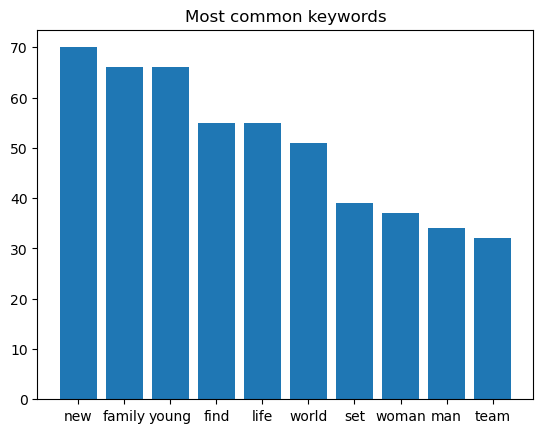

In [138]:
plt.bar(x = key_labels, height = key_val)
plt.title('Most common keywords');

In [139]:
len(keywords_dict.keys())

3514

In [140]:
df_copy.loc[:,keywords_dict.keys()] = 0

In [141]:
for i, kw_l in enumerate(df_copy['keywords']):
    for kw in kw_l:
        df_copy.loc[i, kw] = 1

In [142]:
df_copy.drop('NUMBER', axis = 1, inplace = True)

In [143]:
keyword_bin = np.array(df_copy[keywords_dict.keys()])

In [144]:
movies['keyword_bin'] = keyword_bin

In [145]:
movies['keyword_bin']

array([[1, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 1]], dtype=int64)

In [146]:
tfidf_matrix.shape

(552, 3487)

In [147]:
np.array(tfidf_matrix.todense())

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [148]:
movies['tfidf_keywords'] = np.array(tfidf_matrix.todense())

In [149]:
indices = {}

In [150]:
for i, title in enumerate(df_copy['title']):
    indices[title] = i

In [151]:
indices

{'Cobra Kai': 0,
 'Better Call Saul': 1,
 'Rick and Morty': 2,
 'Peaky Blinders': 3,
 "Grey's Anatomy": 4,
 'Shameless': 5,
 'Ozark': 6,
 'Suits': 7,
 'Seinfeld': 8,
 'The Umbrella Academy': 9,
 'Brooklyn Nine-Nine': 10,
 'Attack on Titan': 11,
 'Manifest': 12,
 'Locke & Key': 13,
 'Day Shift': 14,
 'Dark': 15,
 'Sex Education': 16,
 'The Lord of the Rings: The Return of the King': 17,
 'The Vampire Diaries': 18,
 'Family Guy': 19,
 'Fargo': 20,
 'How I Met Your Mother': 21,
 'Community': 22,
 'Daredevil': 23,
 "Schitt's Creek": 24,
 'Sing 2': 25,
 'RRR': 26,
 'Arcane': 27,
 'The Lord of the Rings: The Two Towers': 28,
 'American Psycho': 29,
 'The Hobbit: An Unexpected Journey': 30,
 'Riverdale': 31,
 'Sons of Anarchy': 32,
 'Mad Men': 33,
 'The Flash': 34,
 'Archer': 35,
 'Mr. Robot': 36,
 "That '70s Show": 37,
 'You': 38,
 '365 Days': 39,
 'Titanic': 40,
 'Bridgerton': 41,
 'Sherlock': 42,
 'Dexter': 43,
 'New Girl': 44,
 'The Expanse': 45,
 'The Gentlemen': 46,
 'The Good Doctor': 

In [152]:
movies['keyword_bin']

array([[1, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 1]], dtype=int64)

In [153]:
movies['imdb_rating'] = df_copy['imdb_rating']

## Calculate similarity and get recommendations

In [154]:
from numpy.linalg import norm

def calculate_similarity(title1,title2, indices, movies):
    cosine = 0
    idx_1 = indices[title1]
    idx_2 = indices[title2]
    genre_1 = movies['genre_bin'][idx_1]
    genre_2 = movies['genre_bin'][idx_2]
    from scipy.spatial import distance
    

    cosine += np.dot(genre_1,genre_2)/(norm(genre_1)*norm(genre_2))
    actor_1 = movies['actor_bin'][idx_1]
    actor_2 = movies['actor_bin'][idx_2]
    cosine += np.dot(actor_1,actor_2)/(norm(actor_1)*norm(actor_2))
    word_1 = movies['tfidf_keywords'][idx_1]
    word_2 = movies['tfidf_keywords'][idx_2]
    cosine += np.dot(word_1,word_2)/(norm(word_1)*norm(word_2)) 

    
    
    return cosine

    
    

In [155]:
df_copy[df_copy['title'] == 'Pretty Little Liars']

,title,year,duration,genre,rating,description,stars,votes,year_str,Action,...,cancer,manufacturing,selling,methamphetamine,rick,grime,ruin,shaped,footstep,roam
67,Pretty Little Liars,0,44.0,0,7.4,Four friends band together against an anonymou...,"['Troian Bellisario, ', 'Ashley Benson, ', 'Lu...",166548,2010-2017,0,...,0,0,0,0,0,0,0,0,0,0


In [156]:
df_copy['genre'] = df.genre

In [157]:
df_copy['year'] = df.year

In [158]:
df['genre']

0             Action, Comedy, Drama
1                      Crime, Drama
2      Animation, Adventure, Comedy
3                      Crime, Drama
4                    Drama, Romance
                   ...             
547           Drama, Horror, Sci-Fi
548          Crime, Drama, Thriller
549         Drama, Horror, Thriller
550       Biography, Drama, History
551          Drama, Fantasy, Horror
Name: genre, Length: 552, dtype: object

In [159]:
df_copy['genre']

0             Action, Comedy, Drama
1                      Crime, Drama
2      Animation, Adventure, Comedy
3                      Crime, Drama
4                    Drama, Romance
                   ...             
547           Drama, Horror, Sci-Fi
548          Crime, Drama, Thriller
549         Drama, Horror, Thriller
550       Biography, Drama, History
551          Drama, Fantasy, Horror
Name: genre, Length: 552, dtype: object

In [160]:
calculate_similarity('Black Mirror', 'Stranger Things', indices, movies)

0.33333333333333337

In [161]:
movies_list = list(df_copy['title'].values)

In [162]:
df_copy['year']

0         (2018– )
1      (2015–2022)
2         (2013– )
3      (2013–2022)
4         (2005– )
          ...     
547       (2011– )
548    (2008–2013)
549    (2010–2022)
550       (2016– )
551    (2005–2020)
Name: year, Length: 552, dtype: object

In [163]:
def get_recommendations(title, movie_list, indices, movies):
    similarity_score = {}
    id_ = indices[title]
    for i in range(len(movies_list)):
        if i != id_:
            similarity_score[movies_list[i]] = calculate_similarity(title, movie_list[i], indices, movies)
    from collections import Counter
    return [k for k,v in Counter(similarity_score).most_common(10)]

In [164]:
movies_list

['Cobra Kai',
 'Better Call Saul',
 'Rick and Morty',
 'Peaky Blinders',
 "Grey's Anatomy",
 'Shameless',
 'Ozark',
 'Suits',
 'Seinfeld',
 'The Umbrella Academy',
 'Brooklyn Nine-Nine',
 'Attack on Titan',
 'Manifest',
 'Locke & Key',
 'Day Shift',
 'Dark',
 'Sex Education',
 'The Lord of the Rings: The Return of the King',
 'The Vampire Diaries',
 'Family Guy',
 'Fargo',
 'How I Met Your Mother',
 'Community',
 'Daredevil',
 "Schitt's Creek",
 'Sing 2',
 'RRR',
 'Arcane',
 'The Lord of the Rings: The Two Towers',
 'American Psycho',
 'The Hobbit: An Unexpected Journey',
 'Riverdale',
 'Sons of Anarchy',
 'Mad Men',
 'The Flash',
 'Archer',
 'Mr. Robot',
 "That '70s Show",
 'You',
 '365 Days',
 'Titanic',
 'Bridgerton',
 'Sherlock',
 'Dexter',
 'New Girl',
 'The Expanse',
 'The Gentlemen',
 'The Good Doctor',
 'Downton Abbey',
 'Smallville',
 'Star Trek: The Next Generation',
 'BoJack Horseman',
 'Love, Death & Robots',
 'Money Heist',
 'Orange Is the New Black',
 'Jurassic Park',
 'P

In [171]:
get_recommendations('South Park', movies_list, indices, movies)

['Family Guy',
 'The Mitchells vs the Machines',
 'The Secret Life of Pets',
 'Rick and Morty',
 'Sing 2',
 'Archer',
 'BoJack Horseman',
 'Big Mouth',
 'Frozen',
 'Sausage Party']

In [166]:
get_recommendations('Emily in Paris', movies_list, indices, movies)

["Breakfast at Tiffany's",
 'Moonrise Kingdom',
 "That '70s Show",
 'As Good as It Gets',
 "To All the Boys I've Loved Before",
 'Drinking Buddies',
 'Modern Family',
 'The Fundamentals of Caring',
 'Mank',
 'Mirror Mirror']